In [1]:
import platform
print(platform.python_version())

3.6.4


In [2]:
import warnings
warnings.filterwarnings(action = 'once')

In [4]:
# import dataiku
import csv
import pandas as pd
import numpy as np
# from dataiku import pandasutils as pdu
import os
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import re
from statistics import mean
import matplotlib.pyplot as plt

In [5]:
col_names =  ['PA_ID', 'SMILES', 'prop']
dfP  = pd.DataFrame(columns = col_names)

suppl = Chem.SDMolSupplier('PFile.sdf')
for mol in suppl:
    if mol is None: continue
    if mol.GetNumAtoms() < 1: continue
    try:
        dfP.loc[len(dfP)] = [mol.GetProp('PA_ID'), Chem.MolToSmiles(mol), mol.GetProp('Amax')]
    except:
        continue
    

In [6]:
dfP.shape

(2031, 3)

In [7]:
dfP.sample(5).head()

PA_ID                                             SMILES  \
881   P1126  CCCCCCCCOC(=O)c1cc2c(cc1O)O[Ni]Oc1cc(O)c(C(=O)...   
681    P880                             O=C(c1ccccc1)N1CCSC1=S   
639    P823               CC(C)(C)c1ccc(OC(=O)c2ccc(O)cc2O)cc1   
1299  P1843  COc1ccc(N=C(NC(=O)c2ccccc2)NC(=O)c2ccccc2)c(OC)c1   
1542  P2252  O=c1[nH]c(-c2ccc(-c3ccccc3)cc2O)cc2ccc([N+](=O...   

                        prop  
881   3.700000000000000e+001  
681   3.000000000000000e+001  
639   2.900000000000000e+001  
1299  3.100000000000000e+001  
1542  3.900000000000000e+001

In [8]:
dfP.to_csv('PFile.csv')

In [7]:
molsP = []
with open('PFile.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        m = Chem.MolFromSmiles(row[2])
        molsP.append((m, row[1]))

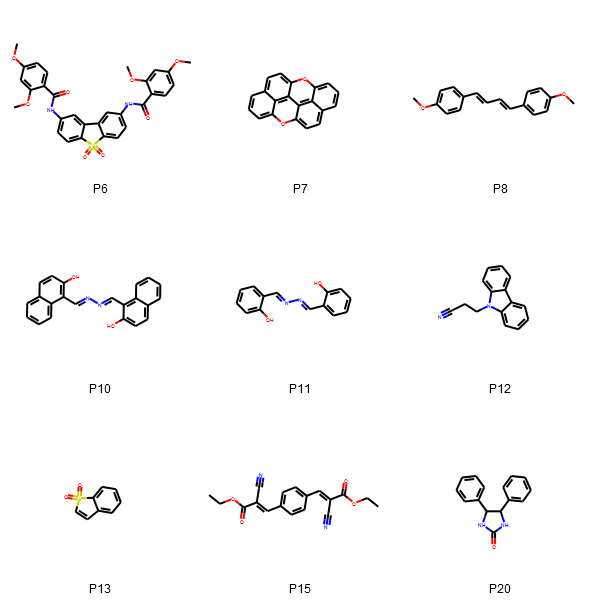

In [8]:
Draw.MolsToGridImage([m[0] for m in molsP[1:10]],
                    legends=[m[1] for m in molsP[1:10]],
                    molsPerRow=3)

In [9]:
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina

In [10]:
fps = []
for m, pa_id in molsP[1:]:
    fps.append(Chem.RDKFingerprint(m, maxPath=5))
    
dist_matrix = []
num_fps = len(fps)
for i in range(1, num_fps):
    similarities = DataStructs.BulkTanimotoSimilarity(fps[i], fps[:i])
    dist_matrix.extend([1-x for x in similarities])
    
clusters = Butina.ClusterData(dist_matrix, num_fps, 0.5, isDistData=True)
print("number of clusters = ", len(clusters))
num_clust_g5 = len([c for c in clusters if len(c) > 5])
print("number of clusters with more than 5 compounds = ", num_clust_g5)

number of clusters =  393
number of clusters with more than 5 compounds =  52


<IPython.core.display.Javascript object>


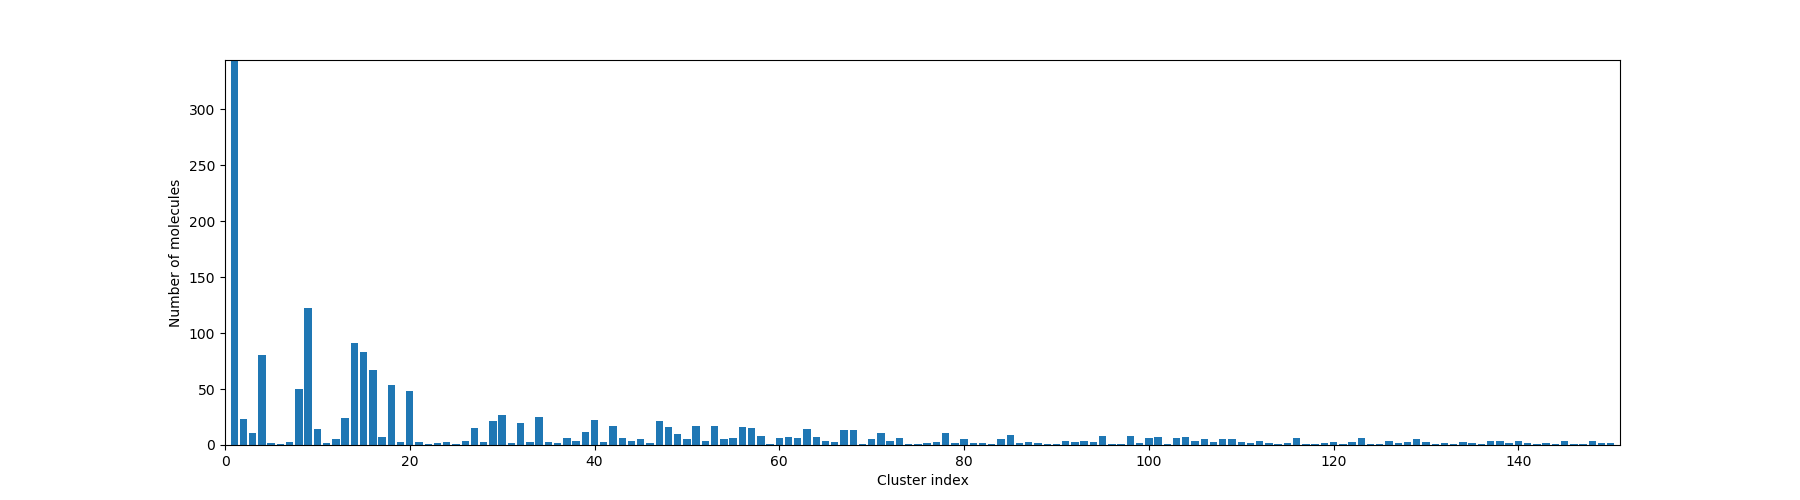

In [11]:
%matplotlib notebook
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize=(18,5))
plt1 = plt.subplot(111)
plt.axis([0, 151, 0, len(clusters[0])+1])
plt.xlabel('Cluster index')
plt.ylabel('Number of molecules')
plt1.bar(range(1, 151), [len(c) for c in clusters[:150]], lw = 0)
plt.show()

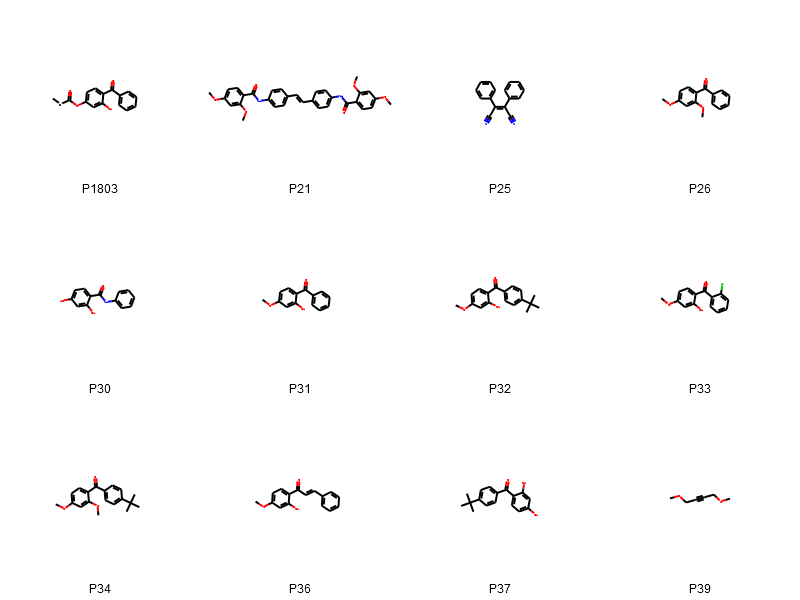

In [12]:
Draw.MolsToGridImage([molsP[i][0] for i in clusters[0][:12]],
                    legends=[molsP[i][1] for i in clusters[0][:12]],
                    molsPerRow = 4)